<a href="https://colab.research.google.com/github/deepakbastola/AI_Science_Medicine/blob/main/Load_Simple_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from skimage.util import montage

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [3]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [4]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [5]:
#MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 139506446.70it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 88484801.92it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49981870.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 912250.58it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [7]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [8]:
X.shape

(60000, 1, 28, 28)

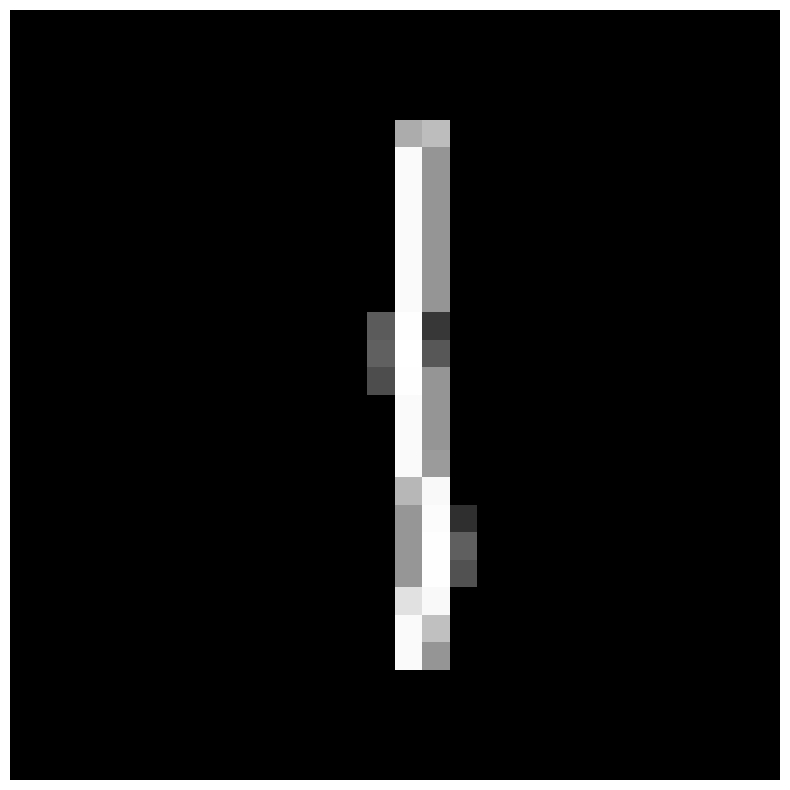

In [9]:
plot(X[1002,0,:,:])

In [10]:
Y[1002]

1

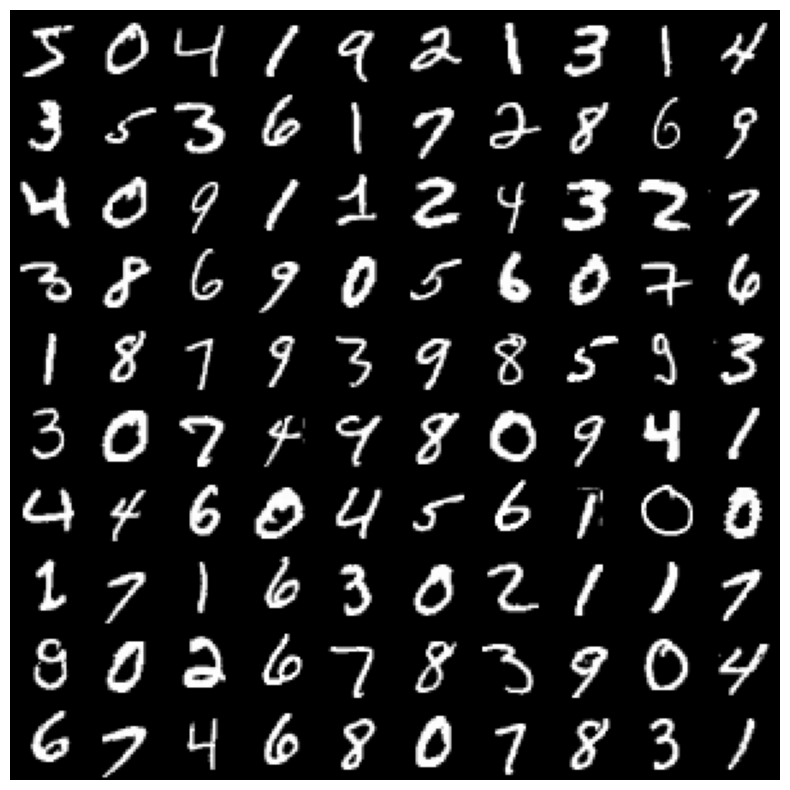

In [11]:
montage_plot(X[0:100,0,:,:])

In [12]:
random_image = np.random.random((5,5)) 

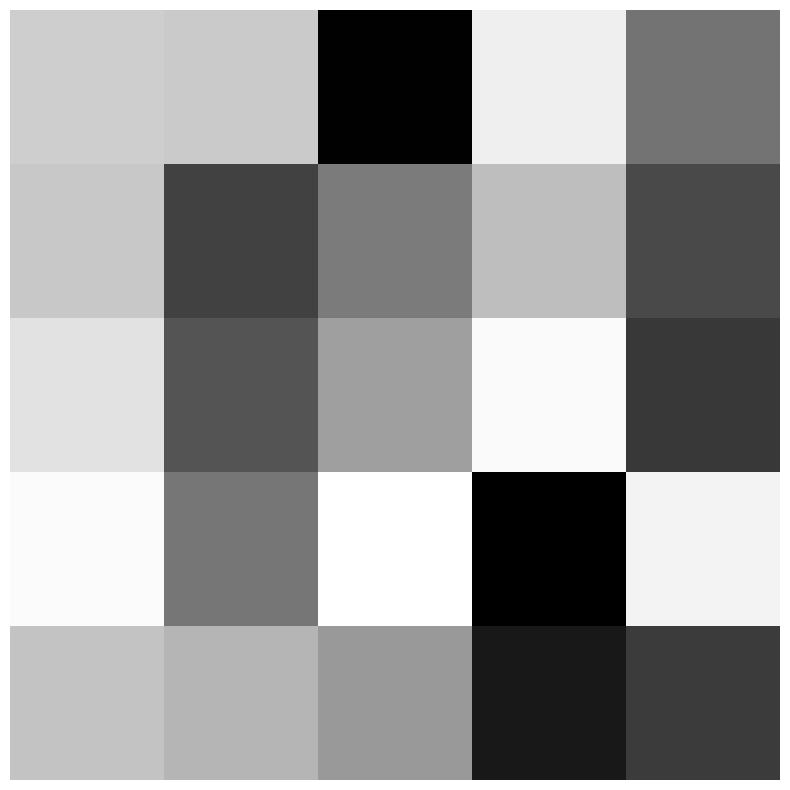

In [13]:
plot(random_image)

In [14]:
random_image

array([[0.76275509, 0.75116011, 0.058673  , 0.87480171, 0.45163245],
       [0.7432647 , 0.2790121 , 0.47884056, 0.70777027, 0.30605443],
       [0.83181747, 0.34505223, 0.60193881, 0.91528148, 0.2530462 ],
       [0.91887893, 0.46304901, 0.93294087, 0.05493475, 0.8890768 ],
       [0.72991566, 0.67873992, 0.58278832, 0.13751629, 0.26001975]])

In [15]:
random_RGB_image = np.random.random((5,5,3)) 

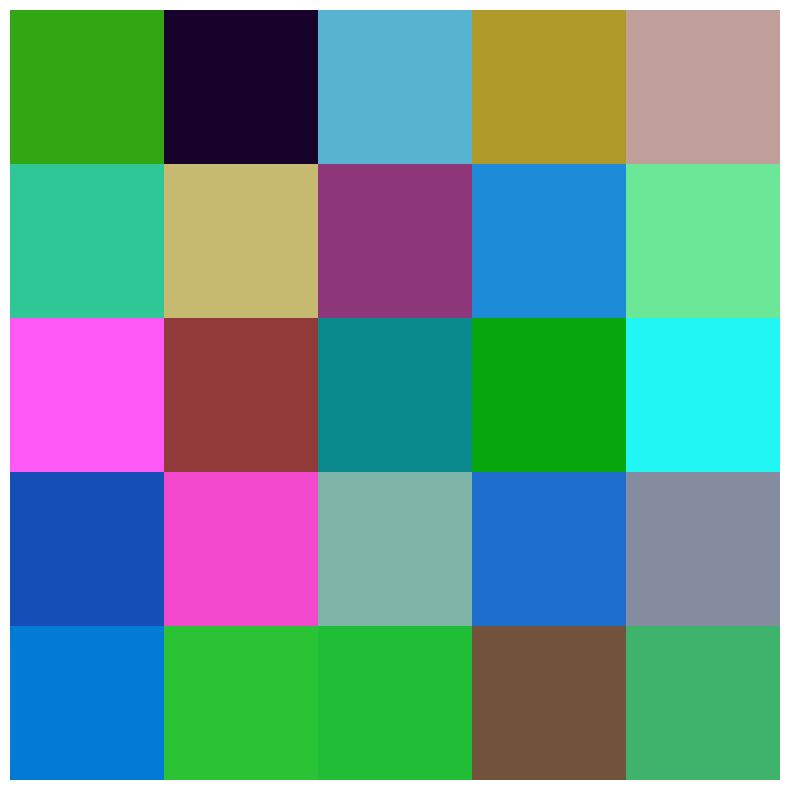

In [16]:
plot(random_RGB_image)

In [17]:
rand_batch_RGB = np.random.random((1000,3,28,28))

In [18]:
rand_batch_RGB.shape

(1000, 3, 28, 28)

In [19]:
rand_batch_RGB = np.transpose(rand_batch_RGB,(0,2,3,1))

In [20]:
rand_batch_RGB.shape

(1000, 28, 28, 3)

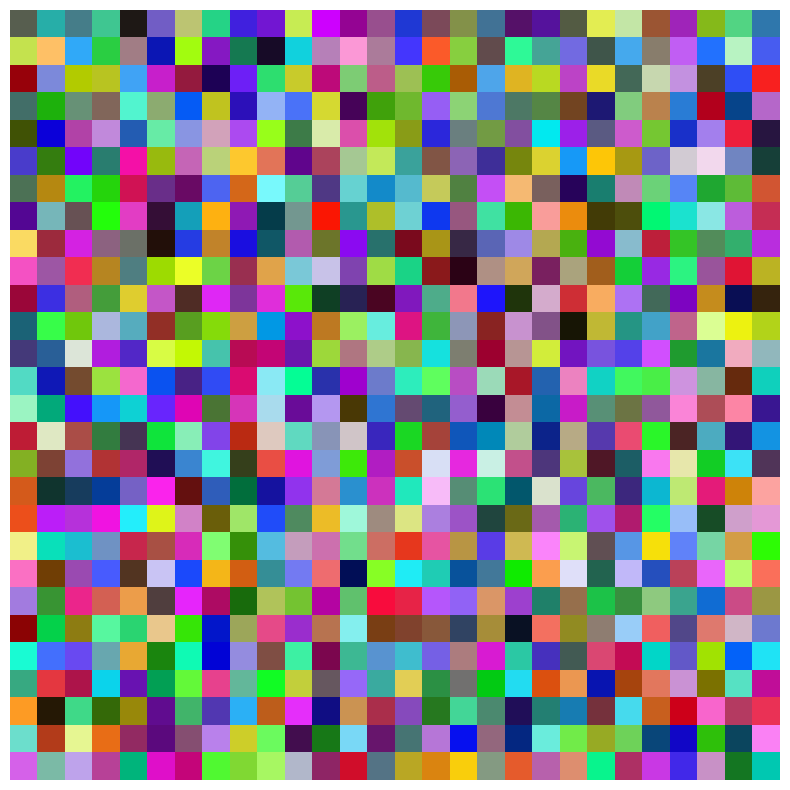

In [21]:
plot(rand_batch_RGB[100,:,:,:])

In [22]:
1*28*28

784

In [23]:
X = X.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [24]:
X.shape

(60000, 784)

In [25]:
x = X[100] 

In [26]:
x.shape

(784,)

In [27]:
 x = x.reshape(28,28)

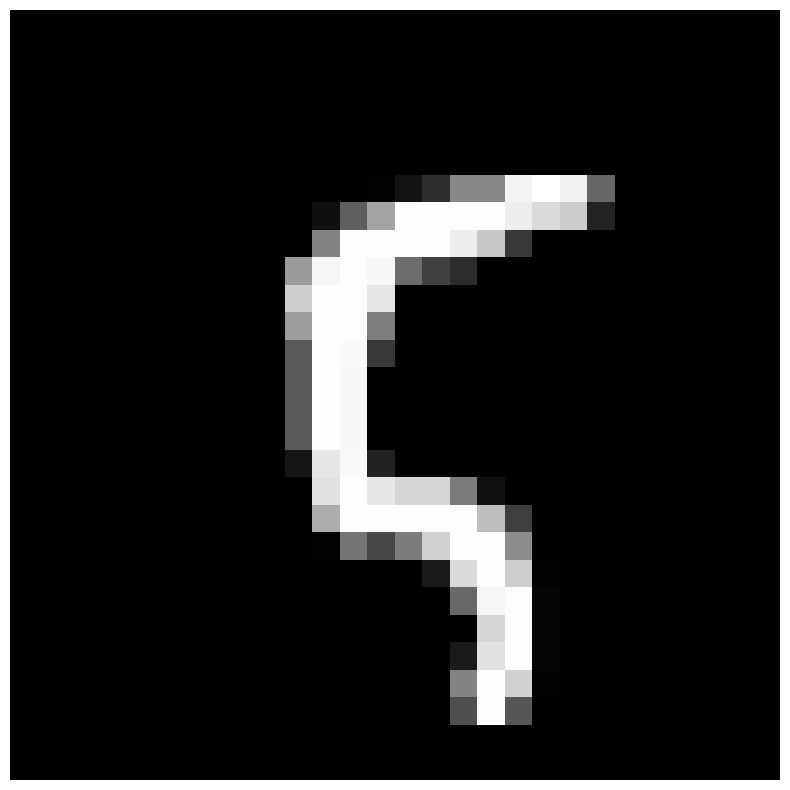

In [28]:
plot(x)

In [29]:
x = np.random.random((784,1))

In [30]:
x.shape

(784, 1)

In [31]:
M = np.random.random((784,784))

In [32]:
M.shape,x.shape

((784, 784), (784, 1))

In [33]:
 y = M@x

In [34]:
%%timeit
y = M@x

223 µs ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
x.shape

(784, 1)

In [36]:
X.shape

(60000, 784)

In [37]:
X = X.T

In [38]:
X.shape

(784, 60000)

In [39]:
M.shape,X.shape

((784, 784), (784, 60000))

In [40]:
%%timeit
y = M@X

1.5 s ± 254 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


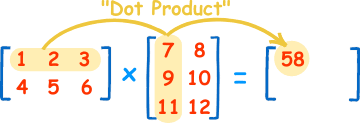

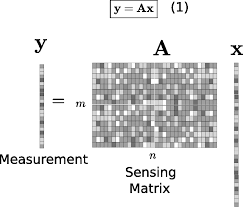

In [42]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [43]:
X.shape

torch.Size([784, 60000])

In [44]:
M = GPU_data(M)

In [45]:
M.shape,X.shape

(torch.Size([784, 784]), torch.Size([784, 60000]))

In [46]:
import time

t0 = time.time()

y = M@X

t1 = time.time()

print(t1-t0)

0.14618396759033203


In [47]:
X.shape

torch.Size([784, 60000])

In [48]:
M = GPU_data(np.random.random((10,784)))

In [49]:
M.shape,X.shape

(torch.Size([10, 784]), torch.Size([784, 60000]))

In [50]:
y = M@X

In [51]:
y.shape

torch.Size([10, 60000])

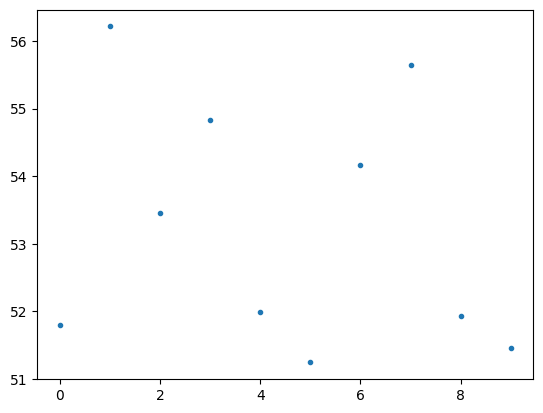

In [52]:
plt.plot(y[:,0].cpu().numpy(),'.')

In [53]:
torch.max(y[:,0])

tensor(56.2156, device='cuda:0')

In [54]:
torch.argmax(y[:,0])

tensor(1, device='cuda:0')